# WeatherPy Homework for Persaud

# Obsevable Trends in the Data
1. The data points to the conclusion that temperature is inversely proportional to longitude. As longitude approaches 0, temperature rises. 
2. As locations approach the uppermost and lowermost longitudes, cloudiness and wind speed seem to increase, in addition to dropping temperatures. The temperatures likely drop at these extreme longitudes because of the presence of polar ice caps and the Arctic Shelf. 
3. Humidity tends to center around the middle latitudes. There are several rainforests and swamps located throughout these middle latitudes. The tilt of the Earth is the most likely explanation for this pehenomenon because of the fact that certain parts of the globe experience different amounts of sunlight throughout the year. 

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
from random import uniform

 column_names = ["City", "Country"]
cities_df = pd.DataFrame(columns=column_names)

In [61]:
 for x in range(2000):
    lat, lng = np.random.uniform(low=-90.000, high=90.000), np.random.uniform(low=-180.000, high=180.000)
    city = citipy.nearest_city(lat, lng)
    cities_df = cities_df.append({"City": city.city_name,"Country": city.country_code,}, ignore_index=True)

 cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      742
City       742
Country    742
dtype: int64

In [62]:
column_names = ["City", "Country","Temperature (F)",
                "Latitude","Longitude","Humidity (%)",
                "Cloudiness (%)", "Wind Speed (mph)"]
newcities_df = pd.DataFrame(columns=column_names)

url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    current_city = row["City"]
    current_url = url + "appid=" + "ec8ce9ae3ae7d672b2fe520eb9895eed" + "&units=IMPERIAL" + "&q=" + current_city.replace(" ","+")
    city_data = requests.get(current_url).json()
    if city_data["cod"] == "404":
        print("Not a real city...")

    else:
        newcities_df.set_value(index, "City", city_data["name"])
        newcities_df.set_value(index, "Country", city_data["sys"]["country"])
        newcities_df.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        newcities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        newcities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        newcities_df.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        newcities_df.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        newcities_df.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(current_url)
        row_count += 1

Beginning Data Retrieval
------------------------
Proceesing: City #  1  |  Loa Janan ID
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=loa+janan


/Users/Kish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Kish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Kish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Kish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/Kish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors ins

------------------------
Proceesing: City #  2  |  Lata IN
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=lata
------------------------
Proceesing: City #  3  |  Capanema BR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=capanema
------------------------
Proceesing: City #  4  |  Hilo US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=hilo
------------------------
Proceesing: City #  5  |  Roald NO
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=roald
Not a real city...
------------------------
Proceesing: City #  6  |  Avarua CK
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=avarua
------------------------
Proceesing: City #  7  |  Port Alfred ZA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d

------------------------
Proceesing: City #  51  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=bluff
------------------------
Proceesing: City #  52  |  Ukwa NG
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=ukwa
------------------------
Proceesing: City #  53  |  Rabo de Peixe PT
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=rabo+de+peixe
------------------------
Proceesing: City #  54  |  Busselton AU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=busselton
------------------------
Proceesing: City #  55  |  Hobart AU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=hobart
------------------------
Proceesing: City #  56  |  Buchanan LR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3

------------------------
Proceesing: City #  99  |  Sorong ID
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=sorong
------------------------
Proceesing: City #  100  |  Richards Bay ZA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=richards+bay
------------------------
Proceesing: City #  101  |  Ilulissat GL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=ilulissat
------------------------
Proceesing: City #  102  |  Amiens FR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=amiens
------------------------
Proceesing: City #  103  |  Cap Malheureux MU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=cap+malheureux
------------------------
Proceesing: City #  104  |  Shizunai JP
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  147  |  Gizo IL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=gizo
------------------------
Proceesing: City #  148  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=severo-kurilsk
------------------------
Proceesing: City #  149  |  Kodiak US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=kodiak
------------------------
Proceesing: City #  150  |  Cabedelo BR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=cabedelo
------------------------
Proceesing: City #  151  |  Zhigansk RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=zhigansk
Not a real city...
------------------------
Proceesing: City #  152  |  Chokurdakh RU
http://api.openweathermap.org

------------------------
Proceesing: City #  192  |  Zaraza VE
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=zaraza
------------------------
Proceesing: City #  193  |  Saint-Augustin FR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=saint-augustin
------------------------
Proceesing: City #  194  |  Coquimbo CL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=coquimbo
------------------------
Proceesing: City #  195  |  Were Ilu ET
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=were+ilu
Not a real city...
------------------------
Proceesing: City #  196  |  Kichmengskiy Gorodok RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=kichmengskiy+gorodok
------------------------
Proceesing: City #  197  |  Kiomboi TZ


Proceesing: City #  240  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=hualmay
------------------------
Proceesing: City #  241  |  Mar del Plata AR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=mar+del+plata
------------------------
Proceesing: City #  242  |  Lompoc US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=lompoc
------------------------
Proceesing: City #  243  |  Bambanglipuro ID
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=bambanglipuro
------------------------
Proceesing: City #  244  |  Burnie AU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=burnie
------------------------
Proceesing: City #  245  |  Shingu JP
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d6

------------------------
Proceesing: City #  286  |  Homer US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=homer
------------------------
Proceesing: City #  287  |  Coffeyville US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=coffeyville
------------------------
Proceesing: City #  288  |  Chiang Klang TH
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=chiang+klang
------------------------
Proceesing: City #  289  |  Constitucion MX
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=constitucion
------------------------
Proceesing: City #  290  |  Tuatapere NZ
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=tuatapere
------------------------
Proceesing: City #  291  |  Sobolevo RU
http://api.openweathermap.org/da

------------------------
Proceesing: City #  332  |  Qingdao CN
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=qingdao
------------------------
Proceesing: City #  333  |  Barcelos PT
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=barcelos
------------------------
Proceesing: City #  334  |  Caravelas BR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=caravelas
------------------------
Proceesing: City #  335  |  Bielsk Podlaski PL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=bielsk+podlaski
------------------------
Proceesing: City #  336  |  Trinidad UY
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=trinidad
Not a real city...
------------------------
Proceesing: City #  337  |  Skala GR
http://api.openweath

------------------------
Proceesing: City #  378  |  Vostok RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=vostok
------------------------
Proceesing: City #  379  |  Ossora RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=ossora
------------------------
Proceesing: City #  380  |  Nichinan JP
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=nichinan
------------------------
Proceesing: City #  381  |  Airai TL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=airai
------------------------
Proceesing: City #  382  |  Fagernes NO
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=fagernes
Not a real city...
------------------------
Proceesing: City #  383  |  Yaan NG
http://api.openweathermap.org/data/2.5/weather?ap

------------------------
Proceesing: City #  425  |  Zonguldak TR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=zonguldak
Not a real city...
------------------------
Proceesing: City #  426  |  Itamaraju BR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=itamaraju
------------------------
Proceesing: City #  427  |  Rome IT
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=roma
------------------------
Proceesing: City #  428  |  Manono CD
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=manono
------------------------
Proceesing: City #  429  |  General Roca AR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=general+roca
------------------------
Proceesing: City #  430  |  Fougamou GA
http://api.openweathermap.org/d

------------------------
Proceesing: City #  472  |  Najran SA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=najran
------------------------
Proceesing: City #  473  |  San Felipe CL
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=san+felipe
Not a real city...
------------------------
Proceesing: City #  474  |  Aleksin RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=aleksin
------------------------
Proceesing: City #  475  |  Dryden CA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=dryden
Not a real city...
------------------------
Proceesing: City #  476  |  Kawai JP
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=kawai
------------------------
Proceesing: City #  477  |  Anadyr RU
http://api.openweathermap.

------------------------
Proceesing: City #  519  |  Gazli UZ
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=gazli
Not a real city...
------------------------
Proceesing: City #  520  |  Temba ZA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=temba
------------------------
Proceesing: City #  521  |  Balgazyn RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=balgazyn
------------------------
Proceesing: City #  522  |  Muros ES
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=muros
------------------------
Proceesing: City #  523  |  Abu Dhabi AE
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=abu+dhabi
------------------------
Proceesing: City #  524  |  Bermejo AR
http://api.openweathermap.org/data/2.5/weather?a

------------------------
Proceesing: City #  564  |  Bakchar RU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=bakchar
------------------------
Proceesing: City #  565  |  Luanda AO
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=luanda
Not a real city...
------------------------
Proceesing: City #  566  |  Springbok ZA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=springbok
------------------------
Proceesing: City #  567  |  Altoona US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=altoona
------------------------
Proceesing: City #  568  |  Mumford GH
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=mumford
------------------------
Proceesing: City #  569  |  Katima Mulilo NA
http://api.openweathermap.org/data

------------------------
Proceesing: City #  610  |  Concordia AR
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=concordia
------------------------
Proceesing: City #  611  |  Barra GM
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=barra
------------------------
Proceesing: City #  612  |  Guane CU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=guane
------------------------
Proceesing: City #  613  |  Alofi NU
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=alofi
------------------------
Proceesing: City #  614  |  Cukai MY
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=cukai
------------------------
Proceesing: City #  615  |  Tsumeb NA
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe5

------------------------
Proceesing: City #  657  |  Kutum SD
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=kutum
------------------------
Proceesing: City #  658  |  Makurdi NG
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=makurdi
------------------------
Proceesing: City #  659  |  Ketchikan US
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=ketchikan
------------------------
Proceesing: City #  660  |  Mabaruma GY
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=mabaruma
------------------------
Proceesing: City #  661  |  Barmer IN
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae3ae7d672b2fe520eb9895eed&units=IMPERIAL&q=barmer
------------------------
Proceesing: City #  662  |  Piltene LV
http://api.openweathermap.org/data/2.5/weather?appid=ec8ce9ae

In [63]:
newcities_df.count()


City                674
Country             674
Temperature (F)     674
Latitude            674
Longitude           674
Humidity (%)        674
Cloudiness (%)      674
Wind Speed (mph)    674
dtype: int64

In [64]:
 
newcities_df = newcities_df.reset_index()
del newcities_df['index']
newcities_df.head()

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Loa Janan,ID,72.59,-0.58,117.09,90,50,1.43
1,Lata,IN,22.19,30.78,78.62,67,0,11.01
2,Capanema,BR,68.9,-25.67,-53.8,100,90,8.05
3,Hilo,US,77.14,19.71,-155.08,57,40,4.7
4,Roald,NO,49.51,62.58,6.12,93,75,4.7


In [65]:
 newcities_df.to_csv("City_Data.csv")

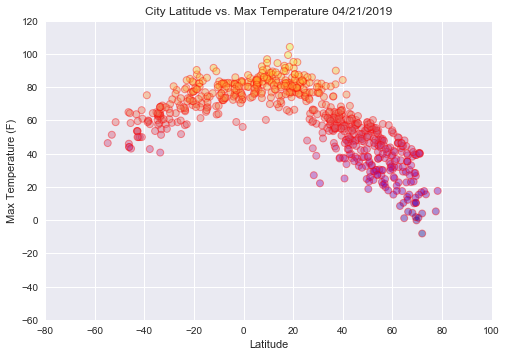

In [67]:
 
plt.scatter(newcities_df["Latitude"], 
            newcities_df["Temperature (F)"], c=newcities_df["Temperature (F)"],
            edgecolor="red", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.4, label="City")

 plt.style.use('seaborn-dark-palette')
#'%m/%d/%Y' is current date mm/dd/yyyy
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")

#plt.savefig("Lat_Temp.png")


plt.show()

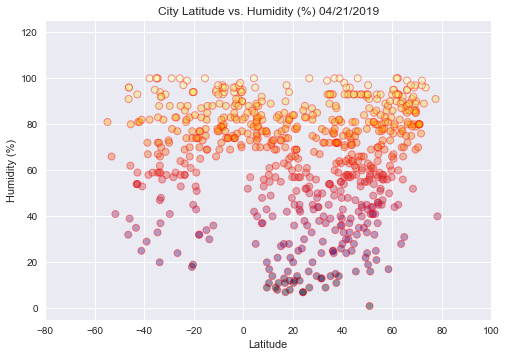

In [68]:
 
plt.scatter(newcities_df["Latitude"], 
            newcities_df["Humidity (%)"], c=newcities_df["Humidity (%)"],
            edgecolor="red", linewidths=1, marker="o", 
            cmap='inferno', alpha=0.4, label="City")

 plt.style.use('seaborn-dark-palette')
plt.title(f"City Latitude vs. Humidity (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.xlim([-80, 100])
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.ylim([-5, 125])

#plt.savefig("Lat_Humid.png")

plt.show()


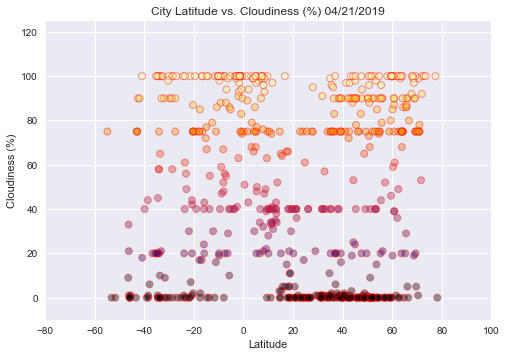

In [69]:
 
plt.scatter(clean_cities_df["Latitude"], 
            clean_cities_df["Cloudiness (%)"], c=clean_cities_df["Cloudiness (%)"],
            edgecolor="red", linewidths=1, marker="o", 
            cmap='inferno', alpha=0.4, label="City")

 plt.style.use('seaborn-dark-palette')
plt.title(f"City Latitude vs. Cloudiness (%) {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 125])

 plt.savefig("lat_cloud.png")

 plt.show()

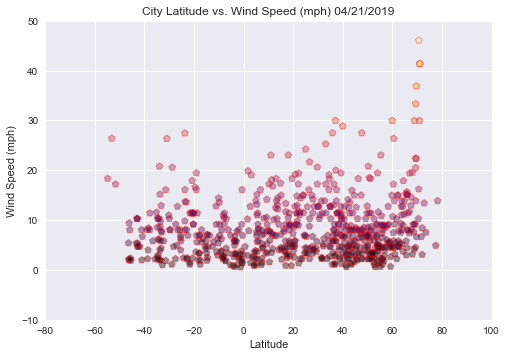

In [75]:
 
plt.scatter(newcities_df["Latitude"], 
            newcities_df["Wind Speed (mph)"], c=newcities_df["Wind Speed (mph)"],
            edgecolor="red", linewidths=1, marker="p", 
            cmap='inferno', alpha=0.4, label="City")

 plt.title(f"City Latitude vs. Wind Speed (mph) {datetime.now().strftime('%m/%d/%Y')}")
plt.xlabel("Latitude")
plt.style.use('seaborn-dark-palette')
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 50])

 #plt.savefig("lat_wind.png")

 plt.show()



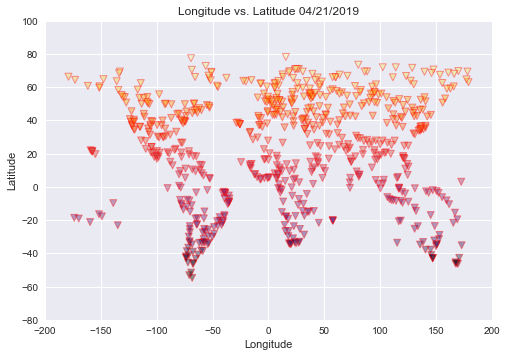

In [73]:
 
plt.scatter(newcities_df["Longitude"], 
            newcities_df["Latitude"], c=newcities_df["Latitude"],
            edgecolor="red", linewidths=1, marker="v", 
            cmap='inferno', alpha=0.4, label="City")

 plt.title(f"Longitude vs. Latitude {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.style.use('seaborn-dark-palette')
plt.grid(True)
plt.xlim([-200, 200])
plt.ylim([-80, 100])


# plt.savefig("lat_long.png")

 plt.show()